In [103]:
import os
import geopandas as gpd
import numpy as np
import pysal as ps
from scipy.spatial import Voronoi, voronoi_plot_2d

import folium
from folium.plugins import MarkerCluster
#from folium.element import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
    
print(folium.__version__)

0.8.3


In [2]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = laptop

In [40]:
fp =  r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile.shp"
panel_qt = gpd.GeoDataFrame.from_file(origin+fp)

In [41]:
panel_qt.columns

Index(['collision_', 'personsinj', 'pedestrian', 'cyclistinj', 'motoristin',
       'bronx', 'brooklyn', 'manhattan', 'queens', 'statenisla', 'distance_t',
       'distance_1', 'distance_2', 'distance_3', 'distance_4', 'distance_5',
       'flag_left_', 'flag_lef_1', 'flag_LPIS_', 'flag_LPIS', 'bike_route',
       'bike_rou_1', 'flag_senio', 'flag_prior', 'flag_schoo', 'flag_stree',
       'quarter', 'year', 'intersecti', 'y', 'x', 'geometry'],
      dtype='object')

In [42]:
panel_qt.columns = ['collision_count','personsinjured','pedestriansinjured','cyclistinjured',
                              'motoristinjured','bronx','brooklyn','manhattan','queens','statenisland',
                              'distance_to_LPIS','distance_to_Street','distance_to_Sch','distance_to_LTC',
                              'distance_to_bikeroute','distance_to_truckroute','flag_left_turn_ever',
                              'flag_left_turn','flag_LPIS_ever','flag_LPIS','bike_route_tv','bike_route_ever',
                              'flag_seniors','flag_priorityinters','flag_school', 'flag_street_improv',
                              'quarter','year','intersection_id','y','x','geometry']

In [43]:
panel_qt.columns

Index(['collision_count', 'personsinjured', 'pedestriansinjured',
       'cyclistinjured', 'motoristinjured', 'bronx', 'brooklyn', 'manhattan',
       'queens', 'statenisland', 'distance_to_LPIS', 'distance_to_Street',
       'distance_to_Sch', 'distance_to_LTC', 'distance_to_bikeroute',
       'distance_to_truckroute', 'flag_left_turn_ever', 'flag_left_turn',
       'flag_LPIS_ever', 'flag_LPIS', 'bike_route_tv', 'bike_route_ever',
       'flag_seniors', 'flag_priorityinters', 'flag_school',
       'flag_street_improv', 'quarter', 'year', 'intersection_id', 'y', 'x',
       'geometry'],
      dtype='object')

In [182]:
panel_qt.crs

{'init': 'epsg:4326'}

In [181]:
#Convert the GeoDataFrame to WGS84 coordinate reference system
panel_qt = panel_qt.to_crs({'init': 'epsg:4326'})

In [183]:
panel_qt.head()

,collision_count,personsinjured,pedestriansinjured,cyclistinjured,motoristinjured,bronx,brooklyn,manhattan,queens,statenisland,...,flag_seniors,flag_priorityinters,flag_school,flag_street_improv,quarter,year,intersection_id,y,x,geometry
0,3,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,2013,1,199793.6093,986336.1490,POINT (-73.9924747033654 40.71506375898986)
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2013,2,202206.1619,982769.3310,POINT (-74.00534169925685 40.72168575821372)
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2013,3,201790.0942,982805.6184,POINT (-74.00521069861965 40.72054375877325)
3,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2013,4,201529.9618,982812.2555,POINT (-74.00518669929268 40.71982975909694)
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2013,5,201226.1097,982816.3956,POINT (-74.00517169906185 40.7189957588827)


In [39]:
fp = r"\Box Sync\Policy Evaluation\input_data\nyc_boroughs_2263\nyc_boroughs_2263.shp"
borough = gpd.read_file(origin+fp)

In [44]:
borough.columns

Index(['bcode', 'bname', 'name', 'namelsad', 'geometry'], dtype='object')

In [109]:
#Convert the GeoDataFrame to WGS84 coordinate reference system
borough = borough.to_crs({'init': 'epsg:4326'})

In [110]:
borough.count()

bcode       5
bname       5
name        5
namelsad    5
geometry    5
dtype: int64

In [111]:
borough_explode = borough.explode()

In [112]:
borough_explode.count()

bcode       85
bname       85
name        85
namelsad    85
geometry    85
dtype: int64

In [17]:
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.shp"
manhattan_panel_qt = gpd.GeoDataFrame.from_file(origin+fp)

In [ ]:
manhattan_panel_qt.columns

In [ ]:
manhattan_panel_qt.columns = ['collision_count','personsinjured','pedestriansinjured','cyclistinjured',
                              'motoristinjured','bronx','brooklyn','manhattan','queens','statenisland',
                              'distance_to_LPIS','distance_to_Street','distance_to_Sch','distance_to_LTC',
                              'distance_to_bikeroute','distance_to_truckroute','flag_left_turn_ever',
                              'flag_left_turn','flag_LPIS_ever','flag_LPIS','bike_route_tv','bike_route_ever',
                              'flag_seniors','flag_priorityinters','flag_school', 'flag_street_improv',
                              'quarter','year','intersection_id','y','x','geometry']

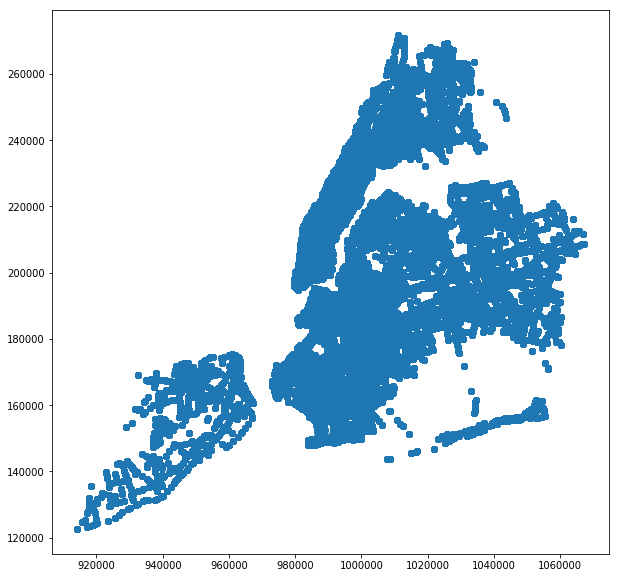

In [5]:
%matplotlib inline

ax = panel_qt.plot(figsize=(10, 10))

In [160]:
# Extracting a cross section
crosssection = gpd.GeoDataFrame(panel_qt.loc[panel_qt['year'] == 2012, ['intersection_id', 'quarter','geometry'] ])

In [161]:
crosssection = gpd.GeoDataFrame(crosssection.loc[crosssection['quarter'] == 3, ['intersection_id', 'quarter','geometry'] ])

In [162]:
type(crosssection)

geopandas.geodataframe.GeoDataFrame

In [163]:
crosssection.crs = {'init': 'epsg:2263'}

In [164]:
type(crosssection)

geopandas.geodataframe.GeoDataFrame

In [165]:
crosssection = crosssection.to_crs({'init': 'epsg:4326'})

In [166]:
crosssection.head()

,intersection_id,quarter,geometry
155844,1,3,POINT (-73.9924747033654 40.71506375898986)
155845,2,3,POINT (-74.00534169925685 40.72168575821372)
155846,3,3,POINT (-74.00521069861965 40.72054375877325)
155847,4,3,POINT (-74.00518669929268 40.71982975909694)
155848,5,3,POINT (-74.00517169906185 40.7189957588827)


In [167]:
crosssection['y']= crosssection.geometry.y
crosssection['x']= crosssection.geometry.x

In [168]:
crosssection.head()

,intersection_id,quarter,geometry,y,x
155844,1,3,POINT (-73.9924747033654 40.71506375898986),40.715064,-73.992475
155845,2,3,POINT (-74.00534169925685 40.72168575821372),40.721686,-74.005342
155846,3,3,POINT (-74.00521069861965 40.72054375877325),40.720544,-74.005211
155847,4,3,POINT (-74.00518669929268 40.71982975909694),40.719830,-74.005187
155848,5,3,POINT (-74.00517169906185 40.7189957588827),40.718996,-74.005172


In [169]:
points = list(zip(crosssection.x,crosssection.y))

In [170]:
regions, vertices = voronoi_frames(points)

In [171]:
regions.crs ={'init': 'epsg:4326'}

In [172]:
regions.crs

{'init': 'epsg:4326'}

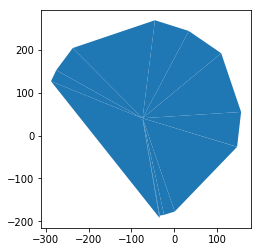

In [173]:
regions.plot()

In [174]:
regions.count()

geometry    12987
dtype: int64

In [175]:
# Overlay with borough to extract the outlines
overlap = gpd.overlay(regions, borough_explode, how='intersection')

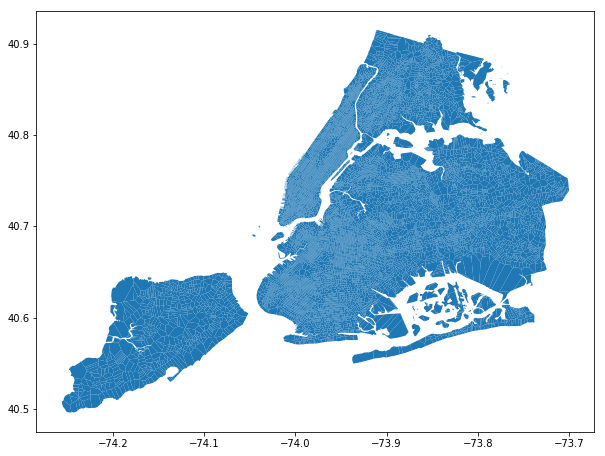

In [203]:
overlap.plot(figsize=(10, 10))

In [177]:
overlap.count()

bcode       13308
bname       13308
name        13308
namelsad    13308
geometry    13308
dtype: int64

Problem: Previously there were only 12987 counts, but now there is 13308

In [178]:
voronoi_intersections = gpd.sjoin(overlap,crosssection, how='inner', op='intersects')

In [179]:
voronoi_intersections.count()

bcode              12983
bname              12983
name               12983
namelsad           12983
geometry           12983
index_right        12983
intersection_id    12983
quarter            12983
y                  12983
x                  12983
dtype: int64

It is suppose to be 12,987, but we only have 12983. But its alright

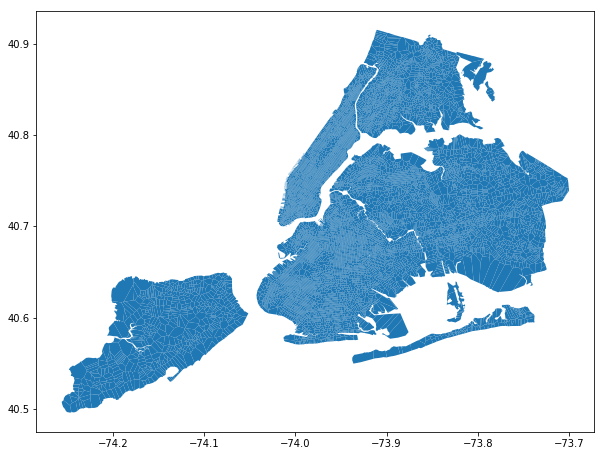

In [204]:
voronoi_intersections.plot(figsize=(10, 10))

## Mapping

In [187]:
panel_qt.columns

Index(['collision_count', 'personsinjured', 'pedestriansinjured',
       'cyclistinjured', 'motoristinjured', 'bronx', 'brooklyn', 'manhattan',
       'queens', 'statenisland', 'distance_to_LPIS', 'distance_to_Street',
       'distance_to_Sch', 'distance_to_LTC', 'distance_to_bikeroute',
       'distance_to_truckroute', 'flag_left_turn_ever', 'flag_left_turn',
       'flag_LPIS_ever', 'flag_LPIS', 'bike_route_tv', 'bike_route_ever',
       'flag_seniors', 'flag_priorityinters', 'flag_school',
       'flag_street_improv', 'quarter', 'year', 'intersection_id', 'y', 'x',
       'geometry'],
      dtype='object')

In [189]:
voronoi_intersections_geojson = voronoi_intersections.to_json()

In [197]:
crosssection_1 = gpd.GeoDataFrame(panel_qt.loc[panel_qt['year'] == 2012, ['intersection_id', 'quarter','collision_count','geometry'] ])

In [199]:
crosssection_1.crs = {'init': 'epsg:2263'}

In [200]:
crosssection_1 = crosssection_1.to_crs({'init': 'epsg:4326'})

In [207]:
# Create the base map
m = folium.Map([40.722360, -73.918108], tiles='Stamen Toner', zoom_start=10)
folium.Choropleth(
 geo_data=voronoi_intersections.to_json(),
 name='choropleth',
 data=crosssection_1,
 columns=['intersection_id', 'collision_count'],
 key_on='feature.id',
 fill_color='YlGn',fill_opacity=0.7, line_opacity=0.2
).add_to(m)
m.save('voronoi_intersections.html')